In [2]:
print("hello world")

hello world


In [3]:
# importiere benoetigte Packete
# Mathematikpaket
import numpy as np
# Paket zum erstellen von Schaubildern
import matplotlib
import matplotlib.pyplot as plt
# Paket fuer statistische Methoden und Zufallsverteilungen
from scipy import stats

[[6 6 5 5 4]
 [6 5 6 5 6]
 [4 4 3 6 2]
 [1 1 4 1 6]
 [5 4 2 5 1]
 [4 3 5 3 3]
 [4 5 5 6 2]
 [1 5 5 4 6]
 [5 5 6 6 1]
 [5 5 2 3 4]
 [3 4 5 1 5]
 [5 5 5 5 4]
 [2 3 6 3 5]
 [3 2 5 3 1]
 [3 2 1 1 6]
 [2 3 1 6 1]
 [4 1 2 6 5]
 [2 1 5 5 3]
 [3 6 5 5 1]
 [4 4 1 5 6]]
[6 6 5 5 4 6 5 6 5 6 4 4 3 6 2 1 1 4 1 6 5 4 2 5 1 4 3 5 3 3 4 5 5 6 2 1 5
 5 4 6 5 5 6 6 1 5 5 2 3 4 3 4 5 1 5 5 5 5 5 4 2 3 6 3 5 3 2 5 3 1 3 2 1 1
 6 2 3 1 6 1 4 1 2 6 5 2 1 5 5 3 3 6 5 5 1 4 4 1 5 6]
[ 5.2  5.6  3.8  2.6  3.4  3.6  4.4  4.2  4.6  3.8  3.6  4.8  3.8  2.8  2.6
  2.6  3.6  3.2  4.   4. ]
(3.8100000000000001, 0.81847419018561607)


/home/karimel/.local/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


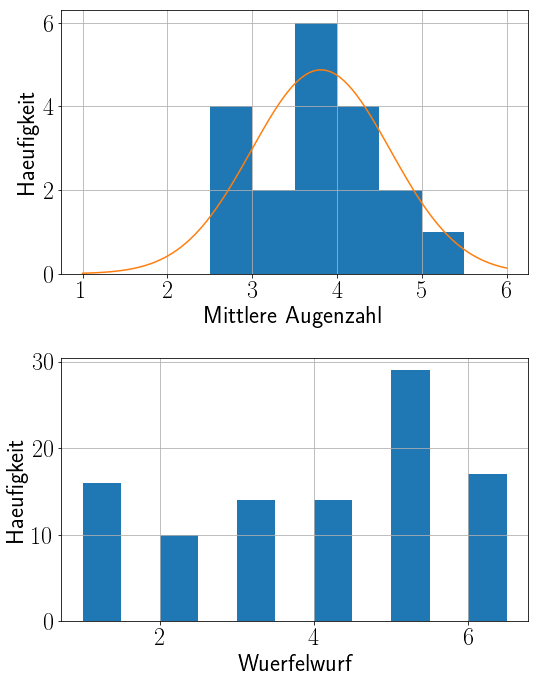

In [5]:

# Setze Optionen fuer den Stil der matplotlib Grafiken
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] ='sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 24

#Anzahl der Wuerfelrunden
n_sets = 20

#Anzahl der Wuerfe pro Runde
n_wuerfe = 5

# Ziehe n_sets x n_wuerfe gleichverteilte Zufallszahlen zwischen 1 und 6
zufallszahlen = np.random.randint( low=1, high=7 , size = ( n_sets, n_wuerfe ) )

# Gebe Ergebnis auf dem Terminal aus
print( zufallszahlen )
# Das Objekt zufallszahlen ist ein 2D array bestehend aus den Wuerfen pro Runde
#print(type(zufallszahlen))
#print(len(zufallszahlen))

# Erstelle 1D array aller Wuerfe
alle_wuerfe=zufallszahlen.flatten()
print(alle_wuerfe)
#print(len(alle_wuerfe))

# Mittelwert der Augenzahlen fuer jede Runde
# Erstelle 1D array mit den Mittelwerten der einzelnen Runden
mittelwerte = zufallszahlen.mean( axis = 1 )
print( mittelwerte )

#Erstellen der Schaubilder
#Erstelle eine Leinwand mit 2 Schaubildern
fig,axes = plt.subplots(2)
# fig = Figure Objekt
# Setze groesse in Zoll (breite, hoehe)
fig.set_size_inches(8,10)
# axes = Axen der beiden Schaubilder
axis_means=axes[0]
axis_wuerfe=axes[1]


#Histogrammiere Ergebnisse
schritt = 0.5
bingrenzen_wuerfe = np.arange( 1, 7, schritt )
bingrenzen_means = np.arange( 1, 6, schritt )
axis_wuerfe.hist( alle_wuerfe, bins=bingrenzen_wuerfe )
axis_means.hist( mittelwerte, bins=bingrenzen_means )

## Schaubild aller Wuerfe
# Grafik plotten
axis_wuerfe.plot()

# Verschoenerung der Darstellung
axis_wuerfe.set_xlabel( r'Wuerfelwurf' )
axis_wuerfe.set_ylabel( r'Haeufigkeit' )
axis_wuerfe.grid( True )


## Schaubild der Mittelwerte
# Anpassung einer Gaussverteilung an die Verteilung der Mittelwerte
fitmittel, standardabweichung = stats.norm.fit( mittelwerte )
print( fitmittel, standardabweichung )

# Grafiken plotten
x = np.linspace( 1, 6, 100 )
y = n_sets * schritt * stats.norm.pdf( x, fitmittel, standardabweichung )
axis_means.plot( x, y )

#Verschoenerung der Darstellung
axis_means.set_xlabel( r'Mittlere Augenzahl' )
axis_means.set_ylabel( r'Haeufigkeit' )
axis_means.grid( True )

In [6]:
plt.savefig( 'wuerfeln.pdf' )
